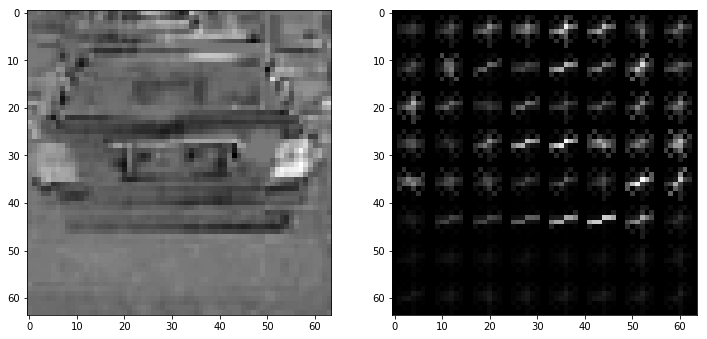

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.FeatureExtractor import FeatureExtractor

# Plot all graphical outputs inline
%matplotlib inline


car = cv2.imread('./training_images/vehicles/KITTI_extracted/145.png')
non_car = cv2.imread('./training_images/non-vehicles/Extras/extra2.png')


YCrCb = cv2.cvtColor(car, cv2.COLOR_BGR2YCrCb)

ch1 = YCrCb[:, :, 0]
ch2 = YCrCb[:, :, 1]
ch3 = YCrCb[:, :, 2]


feature_extractor = FeatureExtractor()

hog1, hog1_image = feature_extractor.get_hog_features(ch1, feature_vec=False, vis=True)
hog2, hog2_image = feature_extractor.get_hog_features(ch2, feature_vec=False, vis=True)
hog3, hog3_image = feature_extractor.get_hog_features(ch3, feature_vec=False, vis=True)


fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)
    
ax = fig.add_subplot(1, 2, 1)
ax.imshow(ch2, cmap="gray")
#ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(hog2_image, cmap="gray")
#ax.axis('off')

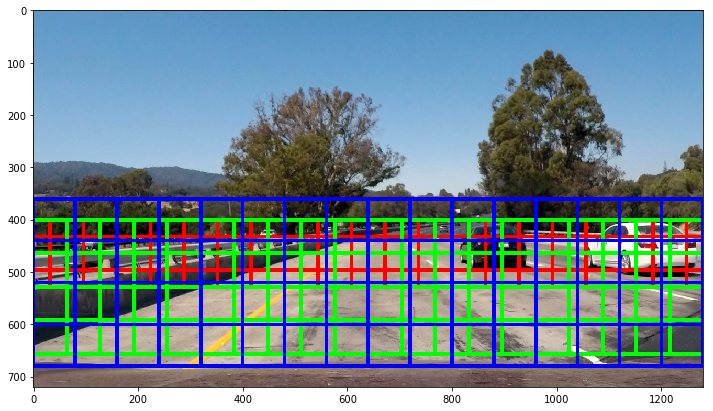

In [26]:
example_image = cv2.imread('./test_images/test1.jpg')

detection_areas = []
detection_areas.append(([400, 528], 64, (0, 0, 255)))
detection_areas.append(([400, 656], 128, (0, 255, 0)))
detection_areas.append(([360, 720], 160, (255, 0, 0)))

def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None],
                 xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step)
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]

            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


for area in detection_areas:
    new_windows = slide_window(example_image, x_start_stop=[None, None], y_start_stop=area[0],
                xy_window=(area[1], area[1]), xy_overlap=(0.5, 0.5))

    for window in new_windows:
        cv2.rectangle(example_image, window[0], window[1], area[2], 6)

    
    
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(12)
plt.imshow(example_image[..., ::-1])

In [ ]:
test_image_files = glob.glob('./test_images/*')

test_images = []

for file in test_image_files:
    img = cv2.imread(file)
    test_images.append(img)